# Pyber Ride Sharing

## Analysis

## Observed Trend 1


## Observed Trend 2

## Observed Trend 3

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [75]:
city_df = pd.read_csv('raw_data/city_data.csv')
ride_df = pd.read_csv('raw_data/ride_data.csv')

In [76]:
display(city_df.head()) 
display(ride_df.head())

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [77]:
merger = ride_df.merge(city_df, on='city')
merger.tail()

,city,date,fare,ride_id,driver_count,type
2402,South Elizabethmouth,2016-04-21 10:20:09,16.50,5702608059064,3,Rural
2403,Matthewside,2016-02-23 17:46:29,59.65,241191157535,4,Rural
2404,Matthewside,2016-02-23 00:43:51,40.84,8665248512368,4,Rural
2405,Matthewside,2016-05-18 02:00:30,48.67,2049161404256,4,Rural
2406,Matthewside,2016-08-08 14:02:35,24.97,2872494724827,4,Rural


## Bubble Plot of Ride Sharing Data

In [78]:
bubble_pivot = pd.pivot_table(merger
                              ,index=['city','type','driver_count']
                              ,values = ['fare','ride_id']
                              ,aggfunc={'fare':np.mean, 'ride_id':len})
bubble_df = pd.DataFrame(bubble_pivot.to_records())
bubble_df.head()

,city,type,driver_count,fare,ride_id
0,Alvarezhaven,Urban,21,23.928710,31
1,Alyssaberg,Urban,67,20.609615,26
2,Anitamouth,Suburban,16,37.315556,9
3,Antoniomouth,Urban,21,23.625000,22
4,Aprilchester,Urban,49,21.981579,19


In [79]:
plt.clf()

markersizer = 4

sns.lmplot(x='ride_id', y='fare', data=bubble_df,scatter=False, size=6, aspect=2)

plt.scatter(x= bubble_df['ride_id'][bubble_df['type'] == 'Urban']
            ,y = bubble_df['fare'][bubble_df['type'] == 'Urban']
            ,c = 'lightcoral'
            ,s = bubble_df['driver_count'] * markersizer
            ,linewidths=1
            ,edgecolor='black'
            ,label='Urban'
            ,marker='o'
            ,alpha = .7
             )
plt.scatter(x= bubble_df['ride_id'][bubble_df['type'] == 'Suburban']
            ,y = bubble_df['fare'][bubble_df['type'] == 'Suburban']
            ,c = 'lightskyblue'
            ,s = bubble_df['driver_count'] * markersizer
            ,linewidths=1
            ,edgecolor='black'
            ,label='Suburban'
            ,marker='o'
            ,alpha = .7
             )
plt.scatter( x = bubble_df['ride_id'][bubble_df['type'] == 'Rural']
            ,y = bubble_df['fare'][bubble_df['type'] == 'Rural']
            ,c = 'gold'
            ,s = bubble_df['driver_count'] * markersizer
            ,linewidths=1
            ,edgecolor='black'
            ,label='Rural'
            ,marker='o'
            ,alpha = .7
             )

In [80]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [12.0, 9.0]


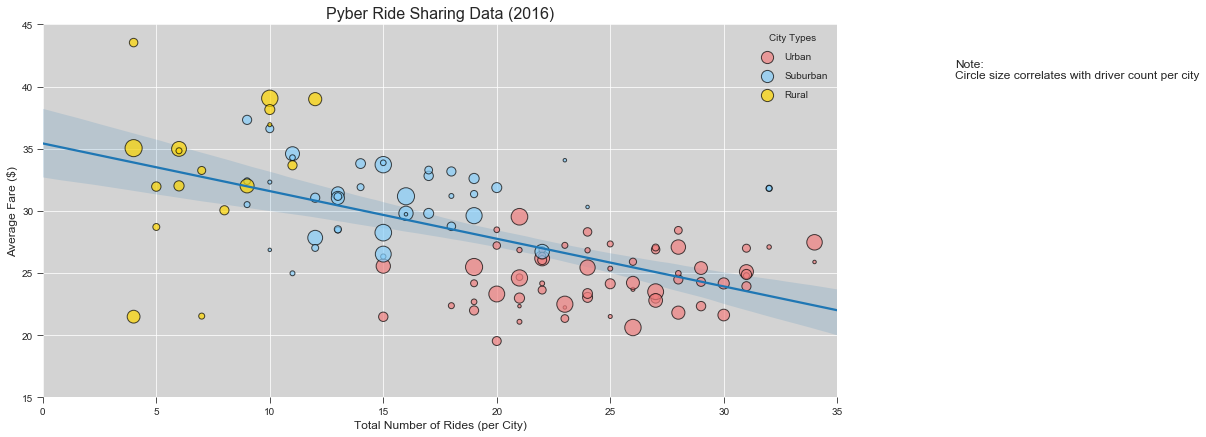

In [81]:
plt.title('Pyber Ride Sharing Data (2016)', fontsize=16)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (per City)', fontsize=12)
plt.xlim(0,35)
plt.ylim(15,45)
plt.legend(title = 'City Types', loc='upper right',framealpha=0,labelspacing=1)
plt.text(40.2,40.65,'Note:\nCircle size correlates with driver count per city', fontsize=12)
plt.grid(alpha = .95,color= 'white')
plt.gca().set_facecolor('lightgray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

## Total Fares by City Type

In [82]:
merger_fare_groupby = merger.groupby('type').sum()
merger_fare_groupby['fare']

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

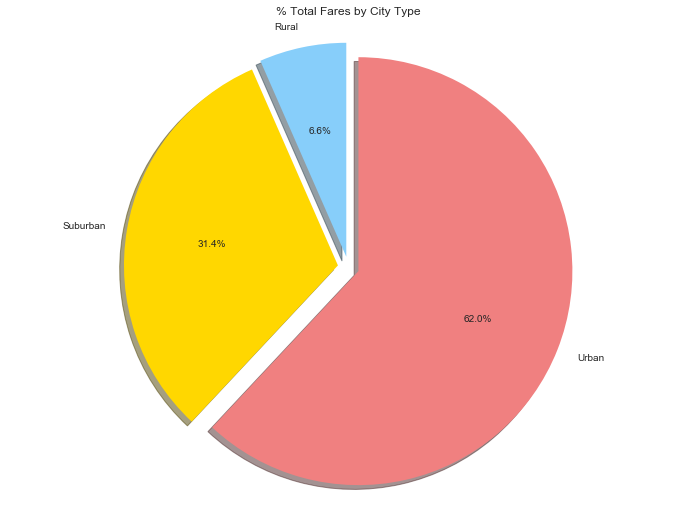

In [83]:
plt.pie(merger_fare_groupby['fare']
        ,explode = (0.05,0.05,0.05)
        ,labels = merger_fare_groupby['fare'].keys()
        ,colors = ["lightskyblue","gold","lightcoral"]
        ,autopct ="%1.1f%%"
        ,shadow = True
        ,startangle = 90)
plt.title("% Total Fares by City Type")
plt.axis("equal")
plt.show()

## Total Rides by City Type

In [84]:
merger_rides_groupby = merger.groupby('type').count()
merger_rides_groupby['ride_id']

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

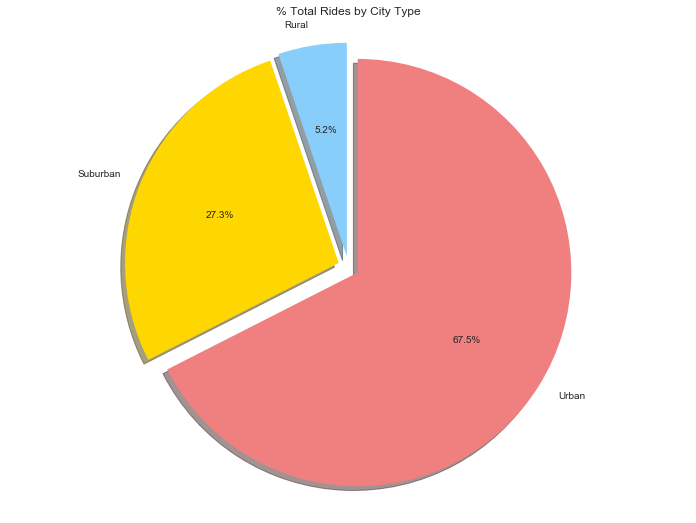

In [85]:
plt.pie(merger_rides_groupby['city']
        ,explode= (0.05,0.05,0.05)
        ,labels = merger_rides_groupby['city'].keys()
        ,colors = ["lightskyblue","gold","lightcoral"]
        ,autopct = "%1.1f%%"
        ,shadow = True
        ,startangle = 90)
plt.title("% Total Rides by City Type")
plt.axis("equal")
plt.show()

## Total Drivers by City Type

In [86]:
merger_drivers_groupby = merger.groupby('type').sum()
merger_drivers_groupby['driver_count']

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

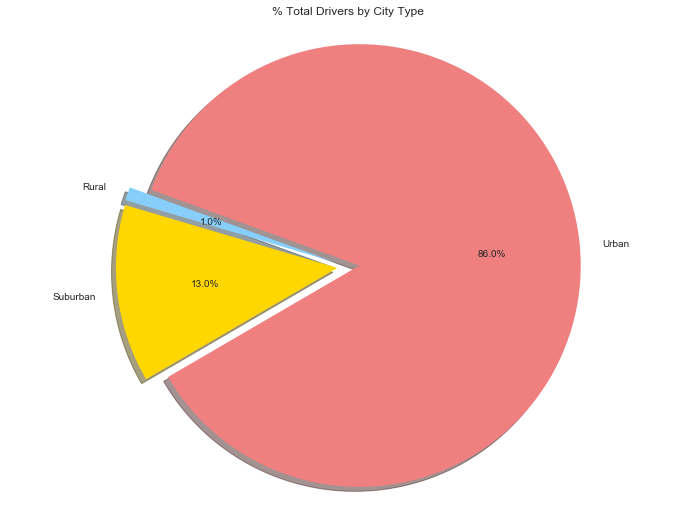

In [87]:
plt.pie(merger_drivers_groupby['driver_count']
        ,explode= (0.05,0.05,0.05)
        ,labels = merger_drivers_groupby['driver_count'].keys()
        ,colors = ["lightskyblue","gold","lightcoral"],
        autopct = "%1.1f%%"
        ,shadow=True
        ,startangle=160)
plt.title("% Total Drivers by City Type")
plt.axis("equal")
plt.show()